In [310]:

import re
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('onpiece.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 57 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1394 non-null   int64  
 1   Japanese Name          1392 non-null   object 
 2   Romanized Name         1391 non-null   object 
 3   Official English Name  1287 non-null   object 
 4   Debut                  1344 non-null   object 
 5   Affiliations           1155 non-null   object 
 6   Occupations            1159 non-null   object 
 7   Status                 1353 non-null   object 
 8   Birthday               688 non-null    object 
 9   Unnamed: 9             1051 non-null   object 
 10  Character              1394 non-null   object 
 11  Origin                 519 non-null    object 
 12  Residence              561 non-null    object 
 13  Age                    443 non-null    object 
 14  Height                 387 non-null    object 
 15  Bloo

In [311]:
df_filtered = df[['Debut', 'Status', 'Affiliations', 'Occupations']]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Debut         1344 non-null   object
 1   Status        1353 non-null   object
 2   Affiliations  1155 non-null   object
 3   Occupations   1159 non-null   object
dtypes: object(4)
memory usage: 43.7+ KB


In [312]:
df_filtered.dropna(inplace=True)
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1041 entries, 0 to 1393
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Debut         1041 non-null   object
 1   Status        1041 non-null   object
 2   Affiliations  1041 non-null   object
 3   Occupations   1041 non-null   object
dtypes: object(4)
memory usage: 40.7+ KB


C:\Users\UwU\AppData\Local\Temp\ipykernel_11072\1129836580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


In [313]:
# convertir a numeros
def extract_chapter(debut):
    match = re.search(r'Chapter (\d+)', str(debut))
    if match:
        return int(match.group(1))
    return None
# Función para extraer la primera ocupación
def extract_first_occupation(occupation):
    return str(occupation).split(';')[0].strip()

In [314]:

df_filtered['Debut'] = df_filtered['Debut'].apply(extract_chapter)
df_filtered['Occupations'] = df_filtered['Occupations'].apply(extract_first_occupation)

df_filtered['Status'] = np.where(df_filtered['Status'] == 'Alive', 1, 0)
df_filtered['Affiliations'] = df_filtered['Affiliations'].apply(lambda x: 1 if 'Pirate' in str(x) else 0)
df_filtered.head(40)

C:\Users\UwU\AppData\Local\Temp\ipykernel_11072\2029567334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Debut'] = df_filtered['Debut'].apply(extract_chapter)
C:\Users\UwU\AppData\Local\Temp\ipykernel_11072\2029567334.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Occupations'] = df_filtered['Occupations'].apply(extract_first_occupation)
C:\Users\UwU\AppData\Local\Temp\ipykernel_11072\2029567334.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

,Debut,Status,Affiliations,Occupations
0,551.0,0,1,Pirate
1,553.0,1,1,Pirate
3,931.0,1,1,Ninja
4,805.0,1,0,Guardian
5,977.0,1,1,Shinuchi
8,309.0,1,1,Pirate
9,717.0,1,1,Leader of Pink Bee Squad
10,77.0,0,0,Mikan Farmer
11,498.0,1,1,Pirate
12,1.0,1,1,Pirate


In [315]:
df_filtered.dropna(inplace=True)
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1026 entries, 0 to 1393
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debut         1026 non-null   float64
 1   Status        1026 non-null   int32  
 2   Affiliations  1026 non-null   int64  
 3   Occupations   1026 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 36.1+ KB


C:\Users\UwU\AppData\Local\Temp\ipykernel_11072\1129836580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


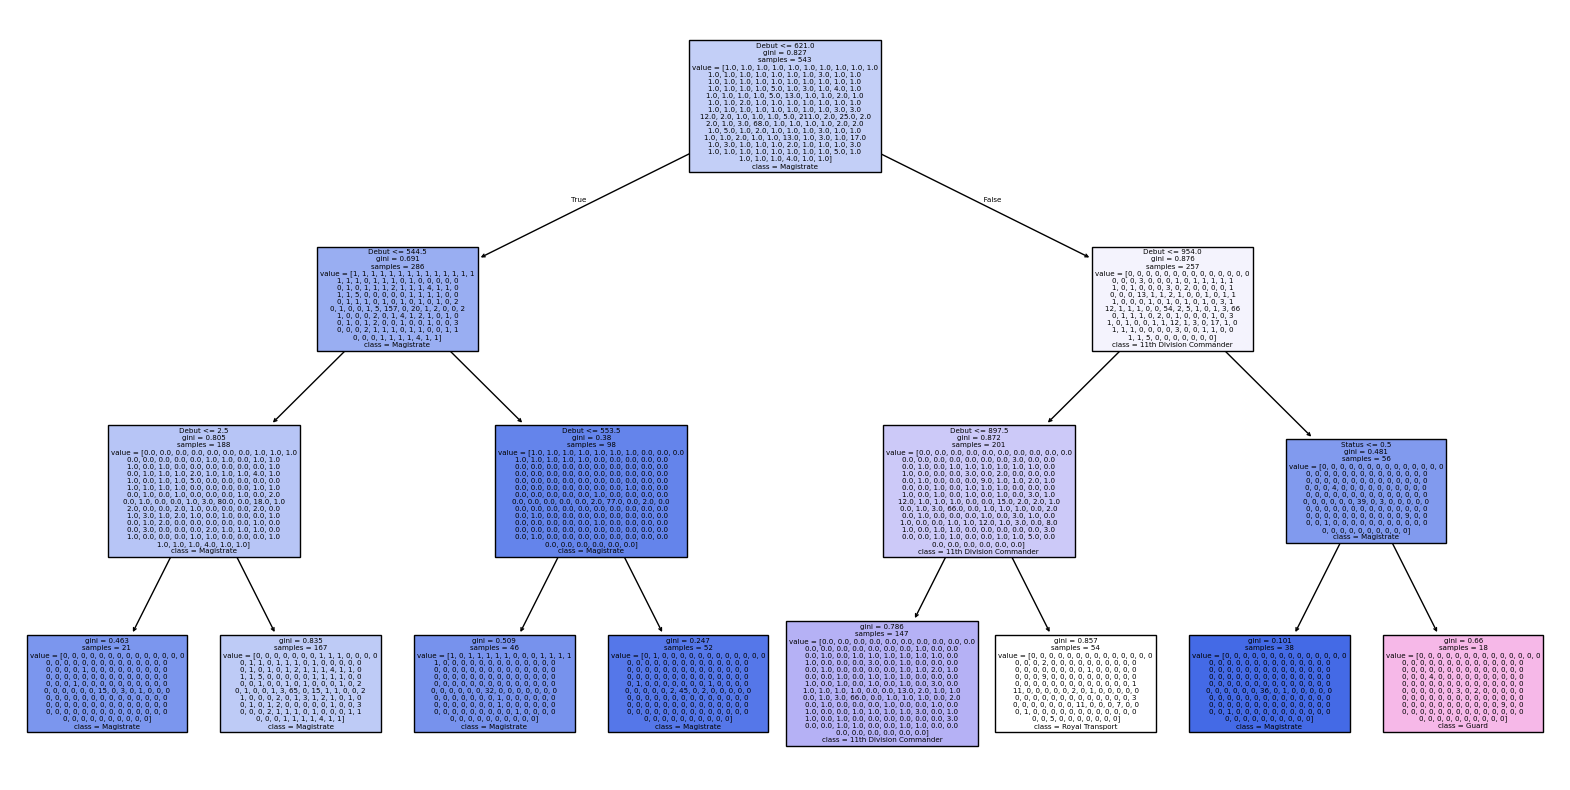

In [316]:
# Características y etiqueta
X = df_filtered[['Debut', 'Status', 'Affiliations']]
y = df_filtered['Occupations']

# Filtrar solo las filas que son piratas
X = X[df_filtered['Affiliations'] == 1]
y = y[df_filtered['Affiliations'] == 1]

# Entrenar el modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Entrenar el modelo
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X, y)

# Visualizar el árbol
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=['Debut', 'Status', 'Affiliations'], class_names=y.unique(), filled=True)
plt.show()